In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('training_set_features.csv')

In [30]:
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [31]:
df.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [32]:
columns_to_en = ['employment_status', 'hhs_geo_region', 'census_msa','income_poverty','age_group',
       'education', 'race','employment_industry','employment_occupation']

In [33]:
df['employment_industry'] = df['employment_industry'].fillna('unemployed')
df['employment_occupation'] = df['employment_occupation'].fillna('unemployed')
df['health_insurance'] = df['health_insurance'].fillna(0)

In [34]:
for col in df.columns:
    print(df[col].value_counts())

respondent_id
0        1
17736    1
17812    1
17811    1
17810    1
        ..
8898     1
8897     1
8896     1
8895     1
26706    1
Name: count, Length: 26707, dtype: int64
xyz_concern
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: count, dtype: int64
xyz_knowledge
1.0    14598
2.0     9487
0.0     2506
Name: count, dtype: int64
behavioral_antiviral_meds
0.0    25335
1.0     1301
Name: count, dtype: int64
behavioral_avoidance
1.0    19228
0.0     7271
Name: count, dtype: int64
behavioral_face_mask
0.0    24847
1.0     1841
Name: count, dtype: int64
behavioral_wash_hands
1.0    22015
0.0     4650
Name: count, dtype: int64
behavioral_large_gatherings
0.0    17073
1.0     9547
Name: count, dtype: int64
behavioral_outside_home
0.0    17644
1.0     8981
Name: count, dtype: int64
behavioral_touch_face
1.0    18001
0.0     8578
Name: count, dtype: int64
doctor_recc_xyz
0.0    19139
1.0     5408
Name: count, dtype: int64
doctor_recc_seasonal
0.0    16453
1.0     8094
Name: count,

In [35]:
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
df['marital_status'] = df['marital_status'].map({'Not Married': 0, 'Married': 1})
df['rent_or_own'] = df['rent_or_own'].map({'Own': 0, 'Rent': 1})

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [37]:
df = df.drop(columns=['respondent_id'],axis=1)

In [38]:
target = pd.read_csv('training_set_labels.csv')
print(target['xyz_vaccine'].value_counts())
target['seasonal_vaccine'].value_counts()

xyz_vaccine
0    21033
1     5674
Name: count, dtype: int64


seasonal_vaccine
0    14272
1    12435
Name: count, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

X = df.copy()
y_a = target['xyz_vaccine']
y_n = target['seasonal_vaccine']

X_train, X_test, y_train_a, y_test_a = train_test_split(X, y_a, test_size=0.2, random_state=5)
_, _, y_train_n, y_test_n = train_test_split(X, y_n, test_size=0.2, random_state=5)

categorical_features = columns_to_en  
numerical_features = [col for col in X.columns if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),  
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')), 
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  
        ]), categorical_features)
    ])

model_pipeline_a = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False))
])

model_pipeline_n = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False))
])

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'classifier__learning_rate': [0.01, 0.02, 0.03, 0.05, 0.75, 0.1],
    'classifier__max_depth': randint(3, 7),
    'classifier__min_child_weight': randint(3, 8),
    'classifier__subsample': [0.4, 0.5, 0.6, 0.7, 0.8],
    'classifier__colsample_bytree': [0.7, 0.8, 0.9],
    'classifier__gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'classifier__n_estimators': [150, 175, 200, 225, 250]
}

random_search_a = RandomizedSearchCV(model_pipeline_a, param_distributions=param_dist, n_iter=50, cv=5, scoring='roc_auc', random_state=42, verbose=1, n_jobs=-1)
random_search_a.fit(X_train, y_train_a)

random_search_n = RandomizedSearchCV(model_pipeline_n, param_distributions=param_dist, n_iter=50, cv=5, scoring='roc_auc', random_state=42, verbose=1, n_jobs=-1)
random_search_n.fit(X_train, y_train_n)

print("Best Parameters for A Vaccine:")
print(random_search_a.best_params_)
print("Best ROC AUC Score for A Vaccine:")
print(random_search_a.best_score_)

print("Best Parameters for N Vaccine:")
print(random_search_n.best_params_)
print("Best ROC AUC Score for N Vaccine:")
print(random_search_n.best_score_)

y_pred_a_rs = random_search_a.best_estimator_.predict(X_test)
print("A Vaccine Classification Report (Randomized Search):")
print(classification_report(y_test_a, y_pred_a_rs))

y_pred_n_rs = random_search_n.best_estimator_.predict(X_test)
print("N Vaccine Classification Report (Randomized Search):")
print(classification_report(y_test_n, y_pred_n_rs))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters for A Vaccine:
{'classifier__colsample_bytree': 0.9, 'classifier__gamma': 0.2, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 6, 'classifier__min_child_weight': 6, 'classifier__n_estimators': 150, 'classifier__subsample': 0.4}
Best ROC AUC Score for A Vaccine:
0.8691582327079319
Best Parameters for N Vaccine:
{'classifier__colsample_bytree': 0.9, 'classifier__gamma': 0.3, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 5, 'classifier__min_child_weight': 6, 'classifier__n_estimators': 200, 'classifier__subsample': 0.5}
Best ROC AUC Score for N Vaccine:
0.8652135270013745
A Vaccine Classification Report (Randomized Search):
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4213
           1       0.73      0.52      0.60      1129

    accuracy                           0.

ROC AUC Score for A Vaccine: 0.8696907395957134
ROC AUC Score for N Vaccine: 0.8584889259468055


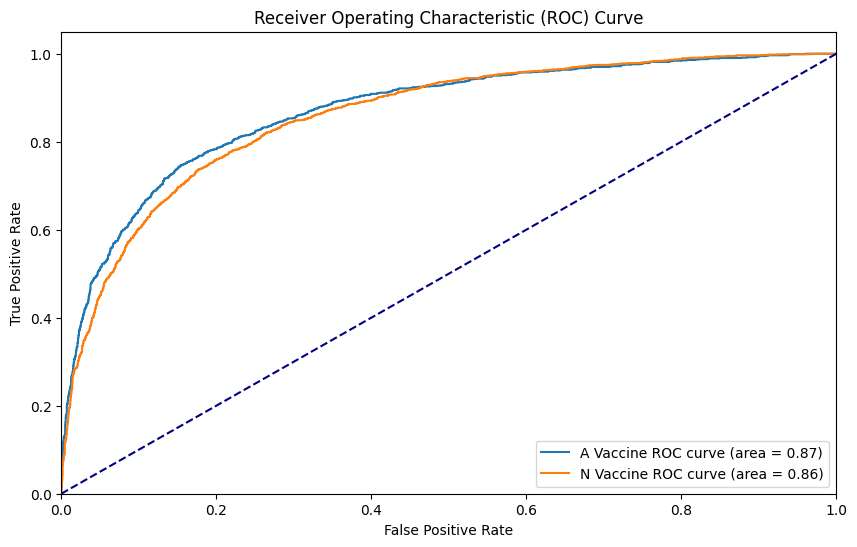

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob_a = random_search_a.predict_proba(X_test)[:, 1]
y_pred_prob_n = random_search_n.predict_proba(X_test)[:, 1]

roc_auc_a = roc_auc_score(y_test_a, y_pred_prob_a)
roc_auc_n = roc_auc_score(y_test_n, y_pred_prob_n)

print("ROC AUC Score for A Vaccine:", roc_auc_a)
print("ROC AUC Score for N Vaccine:", roc_auc_n)

fpr_a, tpr_a, _ = roc_curve(y_test_a, y_pred_prob_a)
fpr_n, tpr_n, _ = roc_curve(y_test_n, y_pred_prob_n)

plt.figure(figsize=(10, 6))
plt.plot(fpr_a, tpr_a, label=f'A Vaccine ROC curve (area = {roc_auc_a:.2f})')
plt.plot(fpr_n, tpr_n, label=f'N Vaccine ROC curve (area = {roc_auc_n:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [41]:
test_set = pd.read_csv('test_set_features.csv')

In [42]:
test_set = test_set[df.columns]

In [43]:
test_set['employment_industry'] = test_set['employment_industry'].fillna('unemployed')
test_set['employment_occupation'] = test_set['employment_occupation'].fillna('unemployed')
test_set['health_insurance'] = test_set['health_insurance'].fillna(0)

In [44]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  26623 non-null  float64
 1   xyz_knowledge                26586 non-null  float64
 2   behavioral_antiviral_meds    26629 non-null  float64
 3   behavioral_avoidance         26495 non-null  float64
 4   behavioral_face_mask         26689 non-null  float64
 5   behavioral_wash_hands        26668 non-null  float64
 6   behavioral_large_gatherings  26636 non-null  float64
 7   behavioral_outside_home      26626 non-null  float64
 8   behavioral_touch_face        26580 non-null  float64
 9   doctor_recc_xyz              24548 non-null  float64
 10  doctor_recc_seasonal         24548 non-null  float64
 11  chronic_med_condition        25776 non-null  float64
 12  child_under_6_months         25895 non-null  float64
 13  health_worker   

In [45]:
test_set['sex'] = test_set['sex'].map({'Male': 0, 'Female': 1})
test_set['marital_status'] = test_set['marital_status'].map({'Not Married': 0, 'Married': 1})
test_set['rent_or_own'] = test_set['rent_or_own'].map({'Own': 0, 'Rent': 1})

In [46]:
y_pred_prob_a_test = random_search_a.best_estimator_.predict_proba(test_set)

y_pred_prob_n_test = random_search_n.best_estimator_.predict_proba(test_set)

In [47]:
submission = pd.read_csv('submission_format.csv')
submission['h1n1_vaccine'] = y_pred_prob_a_test
submission['seasonal_vaccine'] = y_pred_prob_n_test

In [48]:
submission

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.792047,0.727563
1,26708,0.961135,0.960647
2,26709,0.783122,0.301225
3,26710,0.298980,0.109177
4,26711,0.786701,0.555038
...,...,...,...
26703,53410,0.843689,0.567113
26704,53411,0.896810,0.628942
26705,53412,0.795813,0.785438
26706,53413,0.973472,0.736589


In [29]:
submission.to_csv('submission_file.csv')